In [2]:
#import dependicies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
#read in clean cpl_csv
cpl_path = Path("Resources/cpl_clean_df.csv")
cpl_clean_df = pd.read_csv(cpl_path)
cpl_clean_df.head()

,Unnamed: 0,Playerid,Height,Weight,Season,Side,Body Part,Part Specific,Injury Type,Surgery?,Time of Year,Total Regular Season Games Missed,Total Playoff Games Missed
0,0,Player1,"6'9""",225,2005-06,NaN,head,jaw,fracture,Yes,Regular season,10.0,0
1,1,Player1,"6'9""",225,2006-07,NaN,NaN,NaN,illness,No,Regular season,1.0,0
2,2,Player1,"6'9""",225,2006-07,R,knee,NaN,soreness,No,Regular season,1.0,0
3,3,Player1,"6'9""",225,2007-08,R,knee,NaN,effusion,No,Regular season,10.0,0
4,4,Player1,"6'9""",225,2007-08,R,knee,NaN,debridement,Yes,Regular season,65.0,0


In [46]:
#create sub dataframes for analysis
cpl_injury_count = cpl_clean_df["Season"].value_counts().sort_index()

cpl_missed_game_avg = cpl_clean_df[["Season", "Total Regular Season Games Missed"]].groupby("Season").mean()

cpl_top_injuries = cpl_clean_df[["Season", "Injury Type"]].groupby("Season").value_counts().groupby(level = 0).nlargest(3).reset_index(level = 1, drop = True)
cpl_top_injuries = cpl_top_injuries.unstack(fill_value = 0)

cpl_avg_injuries = cpl_clean_df[["Season", "Playerid"]].groupby("Season").value_counts().groupby(level = 0).mean()

cpl_surgeries = cpl_clean_df.drop(cpl_clean_df[cpl_clean_df["Surgery?"].isin(["No", "No "])].index)
cpl_surgeries = cpl_surgeries[["Season", "Surgery?"]].groupby("Season").value_counts()

cpl_illness = cpl_clean_df[["Season", "Injury Type"]]
cpl_illness["isIllness"] = cpl_illness["Injury Type"] == "illness"
cpl_illness = cpl_illness.drop(columns = "Injury Type").reset_index()
cpl_illness = cpl_illness.groupby(["Season", "isIllness"]).size().unstack(fill_value=0)


C:\Users\cpord\AppData\Local\Temp\ipykernel_8676\4129830612.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpl_illness["isIllness"] = cpl_illness["Injury Type"] == "illness"


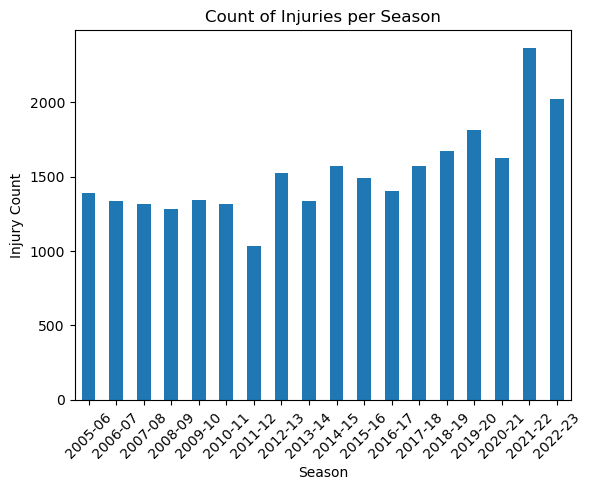

In [5]:
#plot of season by count of injuries
cpl_injury_count.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.xlabel("Season")
plt.ylabel("Injury Count")
plt.title("Count of Injuries per Season")
plt.show()

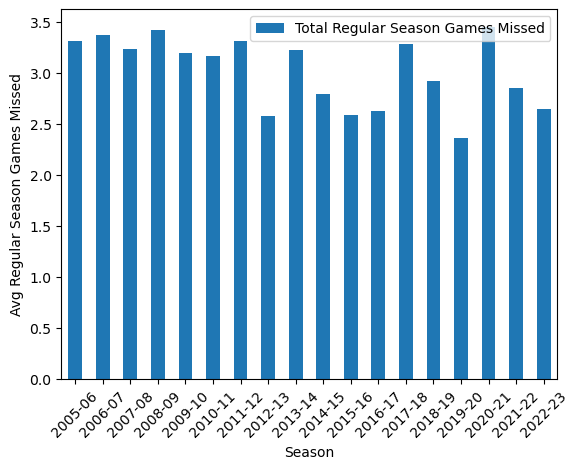

In [5]:
#bar graph of the average number of games missed per season by injured players
cpl_missed_game_avg.plot(kind = "bar")
plt.xlabel("Season")
plt.ylabel("Avg Regular Season Games Missed")
plt.xticks(rotation = 45)
plt.show()

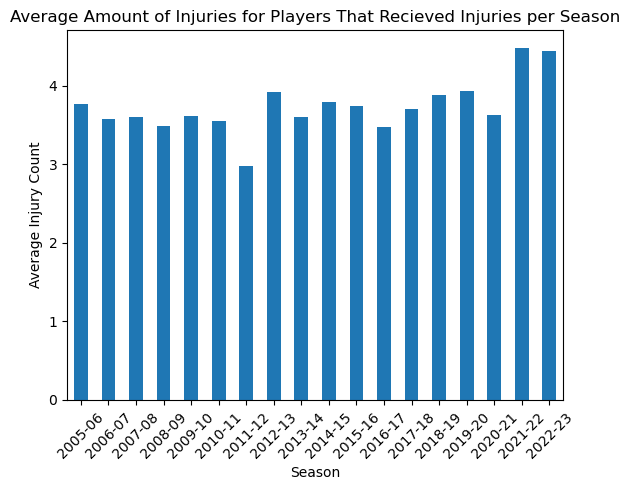

In [11]:
#Create a bar chart for the average number of injuries per injured player per year.
cpl_avg_injuries.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.xlabel("Season")
plt.ylabel("Average Injury Count")
plt.title("Average Amount of Injuries for Players That Recieved Injuries per Season")
plt.show()

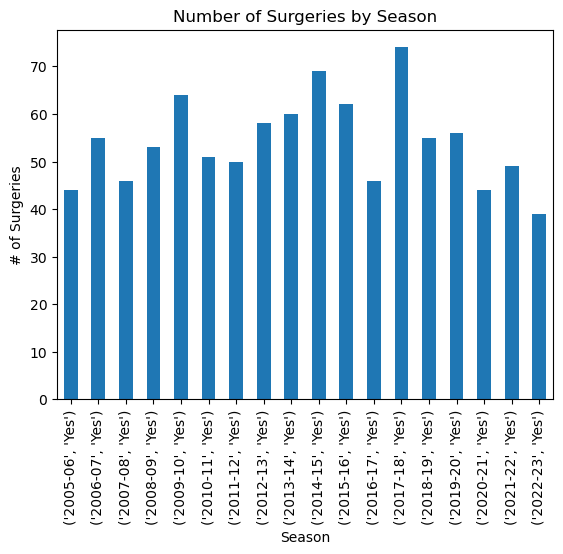

In [46]:
cpl_surgeries.plot(kind = "bar").set_xticklabels(cpl_surgeries.index)
plt.xlabel("Season")
plt.ylabel("# of Surgeries")
plt.title("Number of Surgeries by Season")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

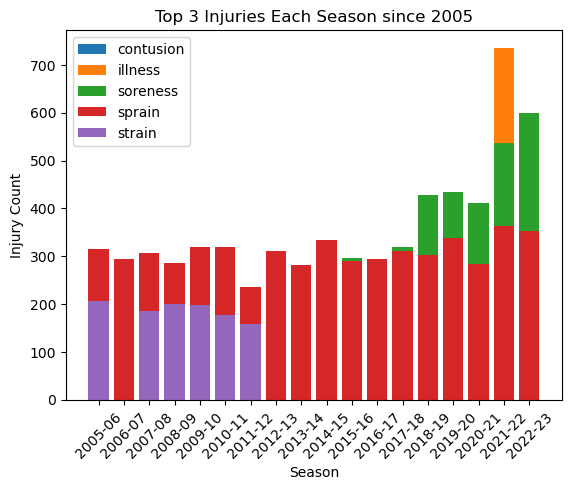

In [35]:
#create stacked bar chart for top 3 types of injuries by year
fig, ax = plt.subplots()
for x in cpl_top_injuries.columns:
    ax.bar(cpl_top_injuries.index, cpl_top_injuries[x], label = x)
plt.xticks(rotation = 45)
plt.xlabel("Season")
plt.ylabel("Injury Count")
plt.title("Top 3 Injuries Each Season since 2005")
plt.legend()
plt.show()

In [47]:
#chi square to test relationship between year and sprains
cpl_sprains_df = cpl_top_injuries["sprain"]
cpl_sprains_df = pd.DataFrame(cpl_sprains_df)
cpl_sprains_df["expected"] = cpl_sprains_df["sprain"].mean()

#find critical value
df = (len(cpl_sprains_df)- 1) * (len(cpl_sprains_df.columns)-1)
cpl_crit_value = stats.chi2.ppf(0.95, df)
print(cpl_crit_value)


27.58711163827534


In [48]:
stats.chisquare(cpl_sprains_df["sprain"],cpl_sprains_df["expected"])

Power_divergenceResult(statistic=48.27870036101083, pvalue=7.783908941094265e-05)

### Sprain Analysis
- Sprains have consistently been a top 3 source of injury in the NBA since 2005.
- Is there a relationship between sprain injuries and seasons?

### Hypothesis Testing 
- Test used: Chi Square
- Null Hypothesis: There is no relationship between sprain injuries and seasons for NBA athletes between 2005 and 2023
- Alternate Hypothesis: There is some kind of relationship between the sprain injuries and seasons seasons for NBA athletes between 2005 and 2023.

We have evidence to reject the null hypothesis. There may be a relationship between the seasons and sprain injuries for NBA players.

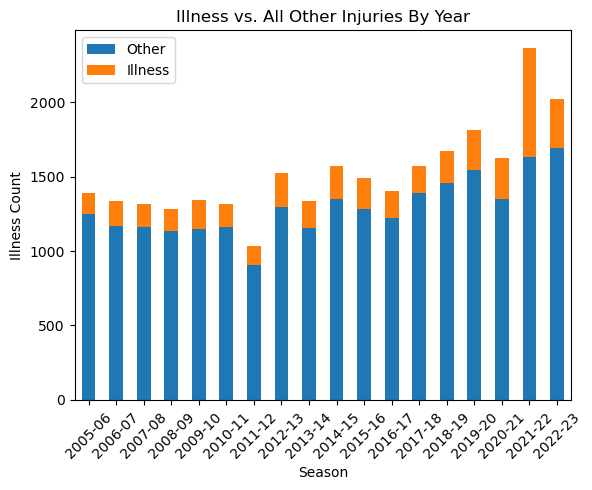

In [67]:
#bar chart to compare illness frequency each year to all other injuries
cpl_illness.plot(kind = "bar", stacked = True)
plt.xticks(rotation = 45)
plt.xlabel("Season")
plt.ylabel("Illness Count")
plt.title("Illness vs. All Other Injuries By Year")
plt.legend(labels = ["Other", "Illness"])
plt.show()

In [62]:
cpl_illness_chi

,True,expected
Season,,
2005-06,143,228.611111
2006-07,167,228.611111
2007-08,154,228.611111
2008-09,150,228.611111
2009-10,193,228.611111
2010-11,154,228.611111
2011-12,126,228.611111
2012-13,226,228.611111
2013-14,183,228.611111


In [61]:
#chi square to test relationship between year and sprains
cpl_illness_chi = cpl_illness.iloc[:,1]
cpl_illness_chi = pd.DataFrame(cpl_illness_chi)
cpl_illness_chi["expected"] = cpl_illness_chi.iloc[:,0].mean()

#find critical value
df2 = (len(cpl_illness_chi)- 1) * (len(cpl_illness_chi.columns)-1)
cpl_crit_value2 = stats.chi2.ppf(0.95, df2)
print(cpl_crit_value2)


27.58711163827534


In [66]:
stats.chisquare(cpl_illness_chi.iloc[:,0],cpl_illness_chi.iloc[:,1])

Power_divergenceResult(statistic=1394.2379100850549, pvalue=2.6753652288345505e-286)

### Illness Analysis
- Illnesses saw a large spike at the in the last few years as a major source of injury
- Is there a relationship between illnesses and seasons?

### Hypothesis Testing 
- Test used: Chi Square
- Null Hypothesis: There is no relationship between illness and seasons for NBA athletes between 2005 and 2023
- Alternate Hypothesis: There is some kind of relationship between the illnesses and seasons seasons for NBA athletes between 2005 and 2023.

We have evidence to reject the null hypothesis. There may be a relationship between the seasons and illnesses for NBA players.